In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 13939, done.
remote: Total 13939 (delta 0), reused 0 (delta 0), pack-reused 13939
Receiving objects: 100% (13939/13939), 12.42 MiB | 9.72 MiB/s, done.
Resolving deltas: 100% (9524/9524), done.


In [2]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [3]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [4]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [5]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 171230011.pdf
'air force'
 ambuj
 Ambuj_CV_Org.pdf
'CBSE - JOINT ENTRANCE EXAMINATION (MAIN) - 2017.pdf'
 Cert
 CNN
'Colab Notebooks'
'Copy of 16MAR08101213-P3DS-055675519050_01_P001.png'
'Copy of 16MAR08101213-P3DS-055675519050_01_P001.TIF'
 CP.pdf
 cross_effects_table_TRUNCATED.csv
 dc_to_the_edge.zip
 deep_learning_time_series_forecasting.pdf
'dim_table (1).gsheet'
'dim_table (2).gsheet'
 dim_table.gsheet
'Document from Ambuj Mishra.pdf'
 domesile.pdf
'Farming Plan.gdoc'
 Fine.pdf
 FRCNN
'Get in Touch .gform'
 INCOME2018.pdf
 master_file.gsheet
 ML_Resource.gdoc
'New Doc 2018-07-24 (4).pdf'
'New Doc 2018-07-28.pdf'
'New Doc 2018-08-12 - Page 1.jpg'
'New Doc 2019-01-18 14.06.25_1.jpg'
'New Doc 2019-01-18 14.06.25_2.jpg'
 Paramveer
 Power_sri
 Sachin_sir
'sem2 (1).jpg'
 sem2.jpg
 Summary
 task_data
 Tripoli_zipped
 Untitled
 Untitled0.ipynb
'Untitled (1)'
'Untitled form.gform'
'Untitled spreadsheet.gsheet'
 Yolo
 yolov3
 YOLOv3_copy_for_Ambuj.ipynb
 Youtube


In [28]:
!cp /mydrive/Tripoli_zipped/Yolo/yolov3.weights /content/darknet/src/yolov3.weights


In [8]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [10]:
%cd darknet/

/content/darknet


In [11]:
!cp /mydrive/Tripoli_zipped/Yolo/obj.zip ../

In [12]:
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
  inflating: data/obj/row-10-col-1.png  
  inflating: data/obj/row-10-col-1.txt  
  inflating: data/obj/row-10-col-10.png  
  inflating: data/obj/row-10-col-10.txt  
  inflating: data/obj/row-10-col-2.png  
  inflating: data/obj/row-10-col-2.txt  
  inflating: data/obj/row-10-col-3.png  
  inflating: data/obj/row-10-col-3.txt  
  inflating: data/obj/row-10-col-4.png  
  inflating: data/obj/row-10-col-4.txt  
  inflating: data/obj/row-10-col-5.png  
  inflating: data/obj/row-10-col-5.txt  
  inflating: data/obj/row-10-col-6.png  
  inflating: data/obj/row-10-col-6.txt  
  inflating: data/obj/row-10-col-7.png  
  inflating: data/obj/row-10-col-7.txt  
  inflating: data/obj/row-10-col-8.png  
  inflating: data/obj/row-10-col-8.txt  
  inflating: data/obj/row-10-col-9.png  
  inflating: data/obj/row-10-col-9.txt  
  inflating: data/obj/row-4-col-10.png  
  inflating: data/obj/row-4-col-10.txt  
  inflating: data/obj/row-4-col-5 (1).png  
  inflating: data/obj/row-4-col

In [16]:
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     voc.names
coco.names  goal.txt	 labels			   openimages.names
dog.jpg     horses.jpg	 obj			   person.jpg


In [18]:
!pwd

/content/darknet


In [15]:
!cp /mydrive/Tripoli_zipped/Yolo/obj.names ./data
!cp /mydrive/Tripoli_zipped/Yolo/obj.data  ./data

In [58]:
!cp /mydrive/Tripoli_zipped/Yolo/yolov3_custom.cfg ./cfg

In [33]:
!cp /mydrive/Tripoli_zipped/Yolo/generate_train.py ./

In [34]:
!python generate_train.py

In [59]:
!pwd

/content/darknet


In [60]:
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


In [23]:
!cp /mydrive/Tripoli_zipped/Yolo/darknet53.conv.74 /content/darknet/

In [ ]:
# train your custom detector
#%cd content/darknet/
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

#darknet53.conv.74

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.114976, GIOU: -0.458707), Class: 0.470031, Obj: 0.603310, No Obj: 0.353563, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 1117.193115, iou_loss = 2.842041, total_loss = 1120.035156 
 total_bbox = 38158, rewritten_bbox = 0.010483 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.400813, GIOU: 0.324225), Class: 0.477546, Obj: 0.315004, No Obj: 0.400835, .5R: 0.272727, .75R: 0.000000, count: 11, class_loss = 91.538063, iou_loss = 4.622299, total_loss = 96.160362 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.400050, GIOU: 0.297774), Class: 0.548832, Obj: 0.384706, No Obj: 0.353477, .5R: 0.384615, .75R: 0.000000, count: 13, class_loss = 283.113312, iou_loss = 9.957336, total_loss = 293.070648 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.

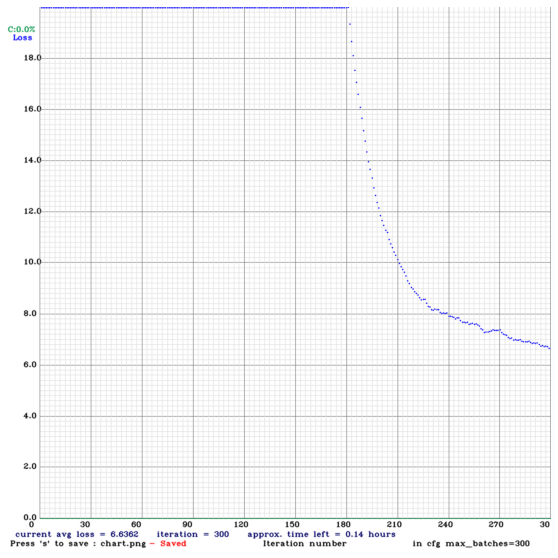

In [36]:
imShow('chart.png')

In [46]:
!cp chart.png /mydrive/Tripoli_zipped/Yolo/loss_plot300.png

In [37]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

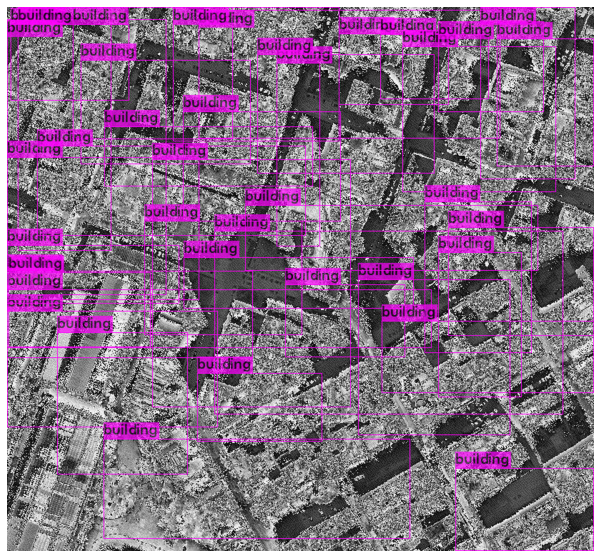

In [55]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/Tripoli_zipped/Yolo/backup/yolov3_custom_final.weights /mydrive/Tripoli_zipped/Yolo/test4.png -thresh 0.02
imShow('predictions.jpg')

In [56]:
!cp predictions.jpg /mydrive/Tripoli_zipped/Yolo/test4_pred_300.jpg